<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Lab 2: Exploratory Data Analysis</center><center><font color='red'>Deadline: February 11, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this lab must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools.
- If you encounter error messages similar to [<font color='brown'>ModuleNotFoundError: </font>No module named 'numpy'], make sure that you've installed the required libraries (refer to instructions in lab 0 for more details).

## Supplementary Materials
We have added links to tutotials for the packages that are used in this lab on Canvas under Modules → Supplementary Materials. This module will be gradually updated throughout the semester. 

## Submission
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 18 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

****

In this lab, we'll explore a very useful dataset from the National Center for Health Statistics [https://www.cdc.gov/nchs/index.htm]. The dataset is from the National 2009 H1N1 Flu Survey (NHFS).

Download the dataset (training_set_features.csv) from Canvas and save it in the same directory as this Jupyter Notebook. All details of the dataset can be found in the accompanying Readme file. 

Now, 
<b>Question 1)</b> Read the dataset using Python's csv module and create a variable 'h1n1_seasonal_flu_dataset' which is a list of rows from the dataset. Each row should be a list of of string values returned by the csv file reader. <b>[2 Points]</b>

<b>Question 2)</b> How many rows does the dataset have? Print the 10th line of the dataset. <b>[2 Point]</b>

In [1]:
import numpy as np
import pandas as pd 

In [2]:
import csv
# Add your code here
count = 0
with open('training_set_features.csv', newline='') as csvfile:
    h1n1_seasonal_flu_dataset_count = csv.reader(csvfile, delimiter=',')
    for row in h1n1_seasonal_flu_dataset_count:
        count = count +1
        if count ==10:
            print("This is the 10th row:", row)
        else:
            continue
        
    print("\nThe number of rows with data that this dataset has is:", count)
    



This is the 10th row: ['9', '2', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '4', '2', '2', '4', '2', '2', '55 - 64 Years', '12 Years', 'White', 'Male', '<= $75,000, Above Poverty', 'Not Married', 'Own', 'Not in Labor Force', 'qufhixun', 'MSA, Not Principle  City', '0', '0', '', '']

The number of rows with data that this dataset has is: 26707


In [3]:
#use jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 in terminal to expand the limit 

h1n1_seasonal_flu_dataset = []
with open('training_set_features.csv', 'r') as file:
#    h1n1_seasonal_flu_dataset = list(csv.reader(file))
    csvreader = csv.reader(file)
    for row in csvreader:
        h1n1_seasonal_flu_dataset.append(row)

print(h1n1_seasonal_flu_dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Data Cleaning

First we have to clean and sanitize the dataset. This dataset is a mixture of numeric and categorical features but contains some '' in some fields to indicate missing values.

<b>Question 3)</b> To make it easier to handle, we convert those fields to 'None'. For convenience, you should define a function "replaceEmpty" that takes a string argument, and returns None if the argument is '', otherwise the value of the string. <b>[2 Points]

In [4]:
def replaceEmpty(x):
    # Complete this function
    if x == '':
        return None
    else:
        return x


In [5]:
h1n1_seasonal_flu_dataset = [[replaceEmpty(x) for x in y] for y in h1n1_seasonal_flu_dataset]
h1n1_seasonal_flu_dataset[10]

['10',
 '2',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '4',
 '1',
 '2',
 '5',
 '4',
 '4',
 '45 - 54 Years',
 '12 Years',
 'White',
 'Male',
 '<= $75,000, Above Poverty',
 'Married',
 'Rent',
 'Employed',
 'lzgpxyit',
 'MSA, Not Principle  City',
 '2',
 '0',
 'xicduogh',
 'qxajmpny']

In the dataset summary, the following are the column names: 

In [6]:
headers = ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
           'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
           'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
           'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
           'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
           'age', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 
           'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 
           'employment_occupation'
]
print(headers)

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']


Now, <b>Question 4)</b> Construct a dictionary mapping these header names to the column numbers 0...36. <b>[2 Points]

In [7]:
#this looks prettier and more clean cut. The dictionary zip thing is down below
copy = h1n1_seasonal_flu_dataset
df = pd.DataFrame(copy)
df.columns = headers
df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1,0,0,0,0,0,0,1,1,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,None,None
1,1,3,2,0,1,0,1,0,1,1,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,2,1,1,0,1,0,0,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,3,1,1,0,1,0,1,1,0,0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,None,None
4,4,2,1,0,1,0,1,1,0,1,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb


In [8]:
#convert to df then back to dictionary
dictionary = df.to_dict("series")
dictionary


{'respondent_id': 0            0
 1            1
 2            2
 3            3
 4            4
          ...  
 26702    26702
 26703    26703
 26704    26704
 26705    26705
 26706    26706
 Name: respondent_id, Length: 26707, dtype: object,
 'h1n1_concern': 0        1
 1        3
 2        1
 3        1
 4        2
         ..
 26702    2
 26703    1
 26704    2
 26705    1
 26706    0
 Name: h1n1_concern, Length: 26707, dtype: object,
 'h1n1_knowledge': 0        0
 1        2
 2        1
 3        1
 4        1
         ..
 26702    0
 26703    2
 26704    2
 26705    1
 26706    0
 Name: h1n1_knowledge, Length: 26707, dtype: object,
 'behavioral_antiviral_meds': 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 26702    0
 26703    0
 26704    0
 26705    0
 26706    0
 Name: behavioral_antiviral_meds, Length: 26707, dtype: object,
 'behavioral_avoidance': 0        0
 1        1
 2        1
 3        1
 4        1
         ..
 26702    1
 26703    1
 26704  

In [102]:
print("There's this way too")
result = {}

i = 0

#this way is no good
# for key, value in zip(headers, copy):
#     if key not in result:
#         result[key] = [(value)]
#     else:
#         result[key].append((value))
#     i = i+1
    
for title in headers:
    result[title] = i
    i = i+1
        
print(result)    

There's this way too
{'respondent_id': 0, 'h1n1_concern': 1, 'h1n1_knowledge': 2, 'behavioral_antiviral_meds': 3, 'behavioral_avoidance': 4, 'behavioral_face_mask': 5, 'behavioral_wash_hands': 6, 'behavioral_large_gatherings': 7, 'behavioral_outside_home': 8, 'behavioral_touch_face': 9, 'doctor_recc_h1n1': 10, 'doctor_recc_seasonal': 11, 'chronic_med_condition': 12, 'child_under_6_months': 13, 'health_worker': 14, 'health_insurance': 15, 'opinion_h1n1_vacc_effective': 16, 'opinion_h1n1_risk': 17, 'opinion_h1n1_sick_from_vacc': 18, 'opinion_seas_vacc_effective': 19, 'opinion_seas_risk': 20, 'opinion_seas_sick_from_vacc': 21, 'age': 22, 'education': 23, 'race': 24, 'sex': 25, 'income_poverty': 26, 'marital_status': 27, 'rent_or_own': 28, 'employment_status': 29, 'hhs_geo_region': 30, 'census_msa': 31, 'household_adults': 32, 'household_children': 33, 'employment_industry': 34, 'employment_occupation': 35}


<b>Question 5)</b> Define the function "getColumn" below that takes a column name and returns the data in that column as a list of strings. <b>[2 Points]</b>

In [10]:
def getColumn(name): 
    # Complete this funtion
    someList = df[name].astype(str).values.tolist()
    return someList


In [11]:
print(getColumn('doctor_recc_h1n1'))

['0', '0', 'None', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', 'None', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', 'None', '0', '0', '0', 'None', '1', '1', 'None', '0', '0', '1', '1', 'None', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', 'None', '0', '0', '0', 'None', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', 'None', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', 'None', '0', '0', '0', 'None', '0', '0', '0', '0', '0', '0', '0', '1', '

## Missing Data

Identifying and treating features with missing values is very important since the data insights or the predictive model's performance could be severely impacted if the missing values were not appropriately handled. There are different strategies for dealing with missing values. The most obvious and often harmful, depending on the amount of missing data, would be deleting all the dataset entries with missing values. Others include deleting features with missing values and imputation, which is the process of substituting the missing data by some statistical methods. Imputation is useful because it preserves all cases by replacing missing data with an estimated value based on other available information. However, it should be used carefully as it often introduces a large amount of bias and reduces variance in the dataset.

<b>Question 6)</b> For the following columns ['household_adults', 'household_children', 'opinion_h1n1_risk', 'h1n1_knowledge'], replace the missing values 'None' with the average value for that column. <b>[10 Points]

In [12]:
# Add your code here
def getColumn(name): 
    # Complete this funtion
    df[name] = pd.to_numeric(df[name])
    df.replace(to_replace=[None], value=np.nan, inplace=True)
    df[name].fillna((df[name].mean()), inplace=True)
    someList = df[name].astype(str).values.tolist()
    return someList


# To verify your work. The following checks should yield False:
print(None in getColumn('household_adults'))
print(None in getColumn('household_children'))
print(None in getColumn('opinion_h1n1_risk'))
print(None in getColumn('h1n1_knowledge'))

False
False
False
False


In [13]:
getColumn("household_adults")

['0.0',
 '0.0',
 '2.0',
 '0.0',
 '1.0',
 '2.0',
 '0.0',
 '2.0',
 '1.0',
 '0.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '2.0',
 '1.0',
 '0.0',
 '1.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '3.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '2.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '2.0',
 '3.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '2.0',
 '0.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '2.0',
 '0.0',
 '1.0',
 '3.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0',
 '3.0',
 '1.0',
 '1.0',
 '2.0',
 '2.0',
 '1.0',
 '0.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '0.0',
 '1.0',
 '1.0',


## Basic Statistics

<b>Question 7)</b> Replace the age groups in the 'age' column with random integer values as follows: the 'age' column defines the age group of the survey respondents and can take one of the two formats: 1) X - Y Years or 2) X+ Years. In the 'age' column, replace the first format with a random integer between X and Y and the second format with a random integer between X and 100. [<b>Hint:</b> use regular expressions to extract the ranges]. <b>[20 Points]</b>

In [14]:
# Add your code here
age = df["age"].values.tolist()
age


['55 - 64 Years',
 '35 - 44 Years',
 '18 - 34 Years',
 '65+ Years',
 '45 - 54 Years',
 '65+ Years',
 '55 - 64 Years',
 '45 - 54 Years',
 '45 - 54 Years',
 '55 - 64 Years',
 '45 - 54 Years',
 '55 - 64 Years',
 '65+ Years',
 '35 - 44 Years',
 '55 - 64 Years',
 '35 - 44 Years',
 '65+ Years',
 '35 - 44 Years',
 '65+ Years',
 '55 - 64 Years',
 '55 - 64 Years',
 '55 - 64 Years',
 '45 - 54 Years',
 '18 - 34 Years',
 '18 - 34 Years',
 '45 - 54 Years',
 '45 - 54 Years',
 '65+ Years',
 '55 - 64 Years',
 '65+ Years',
 '35 - 44 Years',
 '18 - 34 Years',
 '35 - 44 Years',
 '65+ Years',
 '18 - 34 Years',
 '55 - 64 Years',
 '45 - 54 Years',
 '45 - 54 Years',
 '65+ Years',
 '65+ Years',
 '45 - 54 Years',
 '55 - 64 Years',
 '55 - 64 Years',
 '18 - 34 Years',
 '55 - 64 Years',
 '18 - 34 Years',
 '55 - 64 Years',
 '18 - 34 Years',
 '45 - 54 Years',
 '18 - 34 Years',
 '45 - 54 Years',
 '55 - 64 Years',
 '45 - 54 Years',
 '55 - 64 Years',
 '18 - 34 Years',
 '55 - 64 Years',
 '65+ Years',
 '55 - 64 Years',


In [15]:
def getColumn(name): 
    # Complete this funtion
    someList = df[name].tolist()
    return someList

aged = str(getColumn('age'))
aged_list = getColumn('age')

In [16]:
import random
import re

#trying this way out
aged_list = getColumn('age') 

prog = re.compile(r'([0-9][0-9])\s-\s([0-9][0-9])\sYears')

format_match = [] #Empty list

#Find matches in aged
for a in aged_list: 
    #findall usage 
    format_match.append(re.findall(prog, a)) 

#this works =')    
#print(format_match[0:50])

i = 0 
replace_list = []
for num in format_match: 
    #Weird iterating here bc format_match is a list of tuples, so we're trying a different way of separating them
    for n in num: 
        x = int(n[0])
        y = int(n[1])
        new_age = random.randint(x,y)

    #so aside from using sub against your will, I think my other issue was not iterating through the aged_list
    #that might've been why it was just printing out the same number for each substitution
    replace = re.sub(r'([0-9][0-9])\s-\s([0-9][0-9])\sYears', str(new_age), aged_list[i]) 
    
    replace_list.append(replace)
    
#it kind of works, rolling with it
print(replace_list)

['55 - 64 Years', '35 - 44 Years', '18 - 34 Years'
['59', '43', '22', '22', '53', '53', '57', '46', '51', '64', '54', '62', '62', '38', '60', '38', '38', '35', '35', '60', '56', '61', '48', '26', '22', '46', '48', '48', '58', '58', '41', '19', '43', '43', '34', '56', '47', '50', '50', '50', '49', '63', '63', '19', '60', '22', '61', '24', '46', '23', '50', '61', '47', '64', '28', '61', '61', '59', '45', '41', '48', '49', '44', '23', '54', '62', '32', '40', '40', '40', '18', '18', '18', '18', '26', '50', '57', '39', '39', '39', '49', '58', '34', '47', '47', '63', '48', '30', '30', '20', '19', '34', '24', '28', '44', '31', '31', '48', '26', '26', '18', '51', '51', '45', '45', '38', '28', '52', '44', '44', '59', '50', '58', '37', '37', '37', '62', '62', '49', '37', '38', '59', '59', '59', '18', '44', '59', '49', '49', '52', '62', '58', '41', '41', '41', '41', '41', '55', '55', '19', '55', '56', '58', '40', '51', '51', '51', '51', '60', '34', '41', '41', '48', '45', '45', '41', '52', '54', 

In [18]:
print("This will be available, but I am pretty hellbent on making sub work LOL\nCell below is my old code")
# for row_index, row in enumerate(h1n1_seasonal_flu_dataset):

#     for col_index, col_val in enumerate(row):

#         if col_index == df["age"]: # age_group_index here is the index of the age column which you should be able to get from the function mapping the columns names to numbers in one of the questions in the lab.

#             age_group_val = col_val

#             # Add your regular expression here to identify the age ranges.

#             #You can do 
#             x = re.search('(\d+) - (\d+)', age_group_val) 
#             # what this does is simply search for the pattern '(\d+) - (\d+)' in the string age_group_val, 
#             #if it finds a match, it returns a match object and if not you get None.

#             if x: #(we have a match which means age is of the first format)

#                 age = random.randint(int(x.group(1)), int(x.group(2))) # Generating a random integer between the 2 values
#                 sh1n1_seasonal_flu_dataset[row_index][col_index] = age

#             else: #(we don’t have a match and we need to check for the second format)

#                 x = re.search('(\d+)\+', age_group_val)

#             if x:

#                 age = random.randint(int(x.group(1)), 100)
#                 # Update the value in the original dataset = the new value that you generate.
#                 h1n1_seasonal_flu_dataset[row_index][col_index] = age
            

            

This will be available, but I am pretty hellbent on making sub work LOL
Cell below is my old code


In [19]:
# #replace X-Y with one random num between X-Y
#     #ded 

# def re_sucks(match):
# #     ##tried this way, but it's not working either 
#     for num in format_match:
#         x = int(num[0])
#         y = int(num[1])
#         new_age = random.randint(x,y)
#     return str(new_age)

# for num in format_match:
#     x = int(num[0])
#     y = int(num[1])
#     new_age = random.randint(x,y)

#     #printing out new_age does produce random numbers as we go along so why not 
# #print(new_age_list)

#     #wtf is this
#     #replace X-Y format with new x in the string (tried format_match, num,aged, age)    
#     #this isn't replacing with random as it iterates through

#     replace = re.sub(r'([0-9][0-9])\s-\s([0-9][0-9])\sYears', str(new_age), aged)
#     #replace = re.sub(prog, re_sucks, aged)
#     #replace = re.sub(r'\([0-9][0-9])\s-\s\([0-9][0-9])', str(new_age), aged)    

# #Output = [int(new_age) for new_age in set(replace)]

    
    
# print(replace)
# #replace Y with random num between X-100
# #leave X+ 

In [20]:
#replace 65+ with random num between X-100

#take the format X - Y
proggers = re.compile(r'([0-9][0-9][+])\sYears')
#jfc syntax highlighting 

senior_match = proggers.findall(aged)

for i in senior_match:
    old_age = random.randint(65,100)

    old_man = re.sub(r'([0-9][0-9][+])\sYears', str(old_age), str(replace_list))
                     
print(old_man)                     

['59', '43', '22', '22', '53', '53', '57', '46', '51', '64', '54', '62', '62', '38', '60', '38', '38', '35', '35', '60', '56', '61', '48', '26', '22', '46', '48', '48', '58', '58', '41', '19', '43', '43', '34', '56', '47', '50', '50', '50', '49', '63', '63', '19', '60', '22', '61', '24', '46', '23', '50', '61', '47', '64', '28', '61', '61', '59', '45', '41', '48', '49', '44', '23', '54', '62', '32', '40', '40', '40', '18', '18', '18', '18', '26', '50', '57', '39', '39', '39', '49', '58', '34', '47', '47', '63', '48', '30', '30', '20', '19', '34', '24', '28', '44', '31', '31', '48', '26', '26', '18', '51', '51', '45', '45', '38', '28', '52', '44', '44', '59', '50', '58', '37', '37', '37', '62', '62', '49', '37', '38', '59', '59', '59', '18', '44', '59', '49', '49', '52', '62', '58', '41', '41', '41', '41', '41', '55', '55', '19', '55', '56', '58', '40', '51', '51', '51', '51', '60', '34', '41', '41', '48', '45', '45', '41', '52', '54', '58', '20', '20', '44', '37', '33', '33', '44', '43

In [21]:
#replace df[age] with old_man
df["age"] = old_man

<b>Question 8)</b> Find the Minimum, Maximum, Mean, and Standard Deviation of the 'age' column. [<b>Hint</b>: use the numpy package]. <b>[4 Points]</b>

In [22]:
import numpy as np
# Add your code here

newdf = pd.DataFrame(eval(old_man)).astype(float)
newdf.columns = ["age"]
print("Min:", newdf["age"].min())
print("Max:", newdf["age"].max())
print("Mean:", newdf["age"].mean())
print("Standard Deviation:", newdf["age"].std())


Min: 18.0
Max: 64.0
Mean: 44.31534803609541
Standard Deviation: 13.245183605582584


<b>Question 9)</b> Next, define a function named "select" which given a column name and a predicate, returns the values of that column at rows for which the predicate is true. Each predicate is a tuple of two elemetns, where the first element is the column name, and the second element is the filter value. For example, select('age', ('sex', 'Female')), returns the age of subjects with sex=Female. <b>[5 Points]</b> 

In [66]:
def select(columnName, predicate):
    # Complete this function
    
    #predicate will have two values 
    someColumn = predicate[0]
    someFilter = predicate[1]

    #get data 
    x1 = getColumn(someColumn)
    x2 = getColumn(columnName)

    #filter
    df = pd.DataFrame({someColumn:x1, columnName:x2})
    filtered_df = df[df[someColumn]== someFilter]
    
    
    #return these guys
    return np.array(filtered_df[columnName])
    return getColumn(columnName)

In [67]:
print(select('age', ('sex', 'Male'))) # Returns the age of 'Male' subjects

['43' '22' '53' ... '51' '24' '32']


<b>Question 10)</b> Use the numpy package and the select function (defined above) and display the mean age of 'Male' and 'Female' subjects. <b>[10 Points]</b>

In [25]:
print("Just making it harder on myself to keep it consistent")
df2 = df["age"].iloc[1]
df2 = pd.DataFrame(eval(df2))
df2.columns = ["age"]
df["age"] = df2
df["age"]

Just making it harder on myself to keep it consistent


0        59
1        43
2        22
3        22
4        53
         ..
26702    22
26703    24
26704    59
26705    32
26706    32
Name: age, Length: 26707, dtype: object

In [52]:
# Add your code here
m = ((select('age', ('sex', 'Male'))))
male_int = [int(item) for item in m]
male_age = np.mean(male_int)

f =((select('age', ('sex', 'Female'))))
female_int = [int(item) for item in f]
female_age = np.mean(female_int)



print(f'Average Male age = {male_age}\nAverage Female age = {female_age}')

Average Male age = 43.85169140012904
Average Female age = 44.632551393618364


## Histograms of Data Fields

<b>Question 11)</b> Plot the histograms of the 'h1n1_concern' and 'age' columns.[<b>Hint</b> use the matplotlib library]. Make sure your plots have titles and axis labels. <b>[10 Points]</b>

So this is strange and I'm not sure how we'd see the correlation. The max value of H1N1 Concern is 3.0 
All 27k some values would just go into the first bin, the youngest age would not go anywhere near 1-3 of H1N1 concern
The min value of H1N1 concern is 0.0 
I'm not seeing the relationship, but here we are


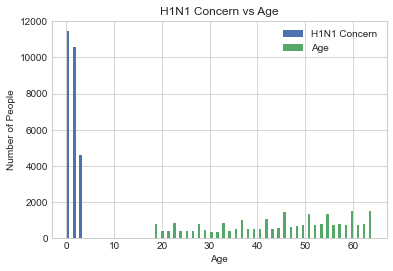

In [93]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# Add your code here
val1 = df["h1n1_concern"].astype(float)
val2 = newdf["age"]

#to get max number of buckets
print("So this is strange and I'm not sure how we'd see the correlation. The max value of H1N1 Concern is", val1.max(),
     "\nAll 27k some values would just go into the first bin, the youngest age would not go anywhere near 1-3 of H1N1 concern")
print("The min value of H1N1 concern is", val1.min(), "\nI'm not seeing the relationship, but here we are")
bins = 50

plt.hist([val1, val2], bins, label=['H1N1 Concern', 'Age'])
# plt.hist(val1, bins, alpha=0.5, label='H1N1 Concern')
# plt.hist(val2, bins, alpha=0.5, label='Age')

plt.legend(loc='upper right')
plt.title("H1N1 Concern vs Age")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()

## Scatter Plots

<b>Question 12)</b> Create a scatter plot of 'age' vs. 'opinion_h1n1_risk' for the first 50 respondents of the survey. Make sure your plot has a title and axis labels. <b>[5 Points]</b>

In [54]:
df["opinion_h1n1_risk"]

0        1.0
1        4.0
2        1.0
3        3.0
4        3.0
        ... 
26702    1.0
26703    2.0
26704    4.0
26705    1.0
26706    1.0
Name: opinion_h1n1_risk, Length: 26707, dtype: float64

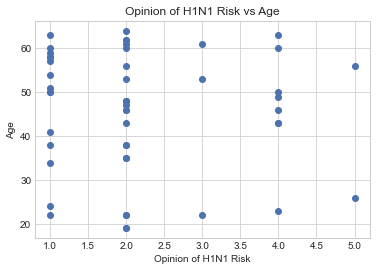

In [55]:
# Add your code here
plt.style.use('seaborn-whitegrid')

# Add your code here
val1 = df["opinion_h1n1_risk"].astype(float).head(50)
val2 = newdf["age"].head(50)


plt.scatter(val1, val2, marker = 'o')

plt.title("Opinion of H1N1 Risk vs Age")
plt.xlabel("Opinion of H1N1 Risk")
plt.ylabel("Age")
plt.show()


We can augment the basic scatter plots with other information that might be relevant. In the plot below, we used the 'h1n1_knowledge' field to color the dots. 'h1n1_knowlegde' is an integer indicating the level of knowledge about H1N1 Flu from 0 to 2. We also make the dots larger with the s=<integer> argument to make the colors easier to see.

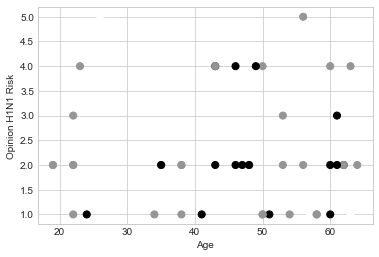

In [56]:
opinion_h1n1_risk = df["opinion_h1n1_risk"].astype(float).head(50)
age= newdf["age"].head(50)
plt.scatter(age, opinion_h1n1_risk, c=[int(x) for x in getColumn('h1n1_knowledge')][0:50], s=50)
plt.xlabel('Age')
plt.ylabel('Opinion H1N1 Risk')
plt.show()

To figure out what color encodes what value, we can do a simple plot of the values 0...2

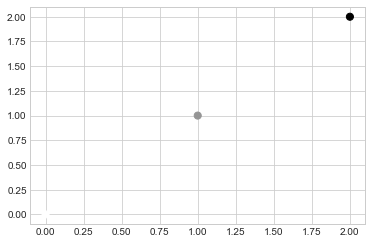

In [57]:
plt.scatter(range(3), range(3), c=range(3), s=50)
plt.show()

<b>Question 13)</b> Now use the select function and draw a scatter plot for 'age' vs. 'opinion_h1n1_risk' only for the subjects with h1n1_knowledge=2. <b>[10 Points]</b>

In [60]:
getColumn("opinion_h1n1_risk")

[1.0,
 4.0,
 1.0,
 3.0,
 3.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 5.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 5.0,
 2.0,
 1.0,
 1.0,
 4.0,
 4.0,
 4.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 2.0,
 5.0,
 4.0,
 4.0,
 1.0,
 4.0,
 3.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 4.0,
 2.0,
 2.0,
 4.0,
 4.0,
 2.0,
 1.0,
 2.0,
 4.0,
 1.0,
 2.0,
 4.0,
 4.0,
 4.0,
 4.0,
 1.0,
 4.0,
 1.0,
 1.0,
 3.0,
 4.0,
 1.0,
 4.0,
 5.0,
 2.0,
 4.0,
 2.0,
 2.0,
 4.0,
 3.0,
 5.0,
 5.0,
 1.0,
 2.0,
 1.0,
 1.0,
 4.0,
 2.0,
 2.0,
 4.0,
 2.0,
 4.0,
 2.0,
 1.0,
 4.0,
 2.0,
 4.0,
 1.0,
 4.0,
 1.0,
 1.0,
 4.0,
 2.0,
 1.0,
 3.0,
 4.0,
 5.0,
 2.0,
 2.0,
 4.0,
 4.0,
 4.0,
 1.0,
 1.0,
 2.0,
 4.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 4.0,
 5.0,
 2.0,
 1.0,
 2.0,
 4.0,
 2.0,
 2.0,
 1.0,
 4.0,
 2.0,
 1.0,
 1.0,
 4.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 4.0,
 2.0

9000
9000


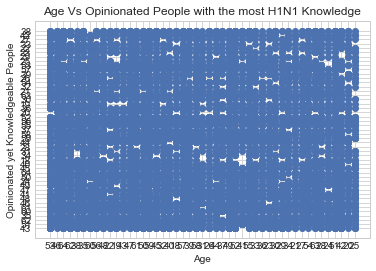

In [73]:
# Add your code here
#my values are integers so converted that "2" to 2.0
#Now use the select function and draw a scatter plot for 'age' vs. 'opinion_h1n1_risk' 
#only for the subjects with h1n1_knowledge=2


opinionated = (select('age', ('opinion_h1n1_risk', 2.0)))[:9000]
knowing = (select('opinion_h1n1_risk', ('h1n1_knowledge', 2.0)))[:9000]

#somehow I lost data somewhere , but it looks reallllyyyyy crowded if we use it all LOL
print(len(opinionated))
print(len(knowing))

plt.title("Age Vs Opinionated People with the most H1N1 Knowledge")
plt.ylabel("Opinionated yet Knowledgeable People")
plt.xlabel("Age")
plt.scatter(opinionated,knowing)
plt.show()

Condensing the data to just 20 points
Turns out that using age as the x axis for both doesn't work so we're changing "knowing" to their opinion
Cool my x axis is messed up, the true scatter


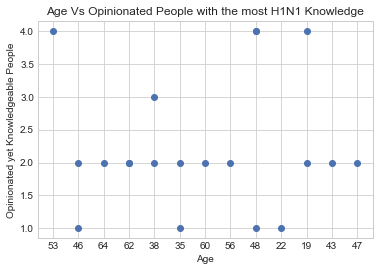

In [77]:
opinionated_short = (select('age', ('opinion_h1n1_risk', 2.0)))[:20]
knowing_short = (select('opinion_h1n1_risk', ('h1n1_knowledge', 2.0)))[:20]

print("Condensing the data to just 20 points")
print("Turns out that using age as the x axis for both doesn't work so we're changing \"knowing\" to their opinion")
print("Cool my x axis is messed up, the true scatter")

plt.title("Age Vs Opinionated People with the most H1N1 Knowledge")
plt.ylabel("Opinionated yet Knowledgeable People")
plt.xlabel("Age")
plt.scatter(opinionated_short,knowing_short)
plt.show()

These scatter plots seem to show trends. To make those clearer we can overlay regression lines. The regression line minimizes the total squared vertical distance from the line to the data points, and shows the general trend for the data. 

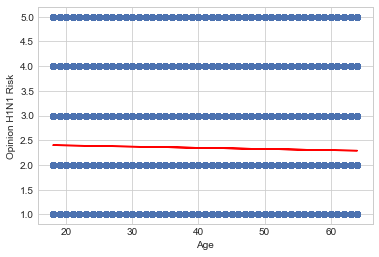

In [80]:
# for numpy we need arrays instead of lists of values
age = np.array(getColumn('age')).astype(int)
opinion_h1n1_risk = [int(x) for x in np.array(getColumn('opinion_h1n1_risk'))]


plt.scatter(age, opinion_h1n1_risk)
plt.xlabel('Age')
plt.ylabel('Opinion H1N1 Risk')
m, b = np.polyfit(age, opinion_h1n1_risk, 1)
plt.plot(age, m*age + b, '-', color='red')
plt.show()

<b>Question 14)</b> Now draw a scatter plot for 'age' vs. 'h1n1_knowledge' and add the regression line. <b>[2 Points]</b>

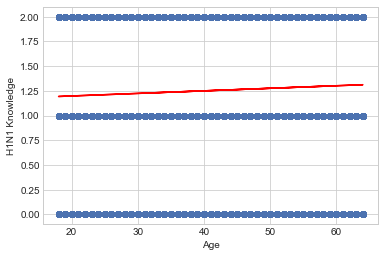

In [81]:
# Add your code here

age = np.array(getColumn('age')).astype(int)
h1n1_knowledge = [int(x) for x in np.array(getColumn('h1n1_knowledge'))]


plt.scatter(age, h1n1_knowledge)
plt.xlabel('Age')
plt.ylabel('H1N1 Knowledge')
m, b = np.polyfit(age, h1n1_knowledge, 1)
plt.plot(age, m*age + b, '-', color='red')
plt.show()

## Critical Thinking with Data

<b> Question 15)</b> Based on the above plot, what's the overall relationship between 'age' and 'opinion_h1n1_risk'?. <b>[2 Points]</b>

<b>Answer:</b> The adults over than 65 years have a slight downturn with their opinions towards H1N1 but are more knowledgable. If I were to assume that lower opinion means that they are more accepting of H1N1 facts then that as they get older, they become more knowledgable of the disease  
Opinion and knowledge are correlated  

## Dimensionality Reduction

Recall that dimensionality reduction allows you to look at the dominant factors in high-dimensional data. Matplotlib includes the PCA function for this purpose. You use it like this:

In [82]:
from sklearn import decomposition
# Using the reducted dataset which doesn't contain categorical features
with open('training_set_features_reduced.csv') as csvfile:
    h1n1_seasonal_flu_dataset_reduced = list(csv.reader(csvfile))
    
# Replacing all '' values with 0
def replaceEmpty(x):
    if x == '': return 0
    else: return int(x)
    
h1n1_seasonal_flu_dataset_reduced = [[replaceEmpty(x) for x in y] for y in h1n1_seasonal_flu_dataset_reduced]

# First put the data in a 2D array
h1n1_seasonal_flu_matrix = np.array(h1n1_seasonal_flu_dataset_reduced) 
pca = decomposition.PCA(n_components=2)
pcs = pca.fit_transform(h1n1_seasonal_flu_matrix) # leave out columns with None in them

<b>Question 16)</b> In order to see the relationship between the two main principal components, draw a scatter plot and add the regression line. <b>[10 Points]</b>

[1.33530000e+04 2.67147983e+00]
[ 1.33520000e+04 -2.44775394e+00]


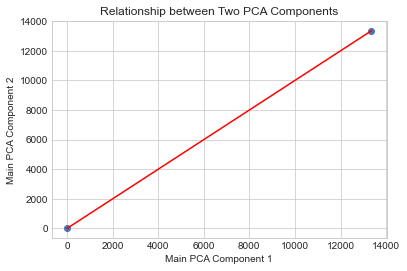

In [104]:
# Add your code here

#component 1
print(pcs[0])
#component 2
print(pcs[1])

x = (pcs[0])
y = (pcs[1])


plt.title("Relationship between Two PCA Components")
plt.xlabel('Main PCA Component 1')
plt.ylabel('Main PCA Component 2')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, '-', color='red')
plt.scatter(x, y)
plt.show()

## Text Data Processing

Download the NY times Dataset from Canvas and save it to the same directory as this Jupyter Notebook.

This file has 3 header lines: Number of Documents, Number of Distinct Words, and Total Number of Words. The following lines represent the documents with three fields:

> docid wordid wordcount

We can read the file with a csv reader:

In [83]:
with open("docword.nips.txt") as csvfile:
    ndocs = int(csvfile.readline())
    nwords = int(csvfile.readline())
    nnz = int(csvfile.readline())
    nips_raw_data = list(csv.reader(csvfile, delimiter=' '))
    
nips_data = [[int(x) for x in y] for y in nips_raw_data] # Convert from string to numeric data

In [84]:
[ndocs, nwords, nnz]

[1500, 12419, 746316]

Now we're going to create an array 'counts' containing the counts for each word over all documents. Note that we use 'row[1] - 1' as the index. The docword files use 1-based array indexing, but Python uses zero-based indexing:

In [85]:
counts = [0] * nwords
for row in nips_data:
    counts[row[1]-1] += row[2] # increment the count for this word by the value in the third column

Next we zip the word index as the first column, and sort this table by word count in descending order.

In [86]:
import operator
wordtab = list(zip(range(nwords), counts))
wordtab.sort(key=lambda x: x[1], reverse=True)

The top (first) values in this list are the most frequent word ids (first column), and their counts (second column):

In [87]:
wordtab[0:8]

[(7357, 25977),
 (7010, 18665),
 (6119, 16075),
 (4269, 14704),
 (5398, 13993),
 (7364, 12667),
 (10002, 11677),
 (315, 11250)]

Now grab the vocabulary file for nips from Canvas and save it to the same directory as this Jupyter Notebook.
Run the following to load it and create a dictionary (word -> wordid) and inverse dictionary (wordid -> word) from it:

In [88]:
mydict = {}            # Word dictionary
words = [''] * nwords  # Invese dictionary - just an array of strings
i = 0
with open("vocab.nips.txt") as txtfile:
    for line in txtfile:
        word = line.rstrip('\n')
        mydict[word] = i
        words[i] = word
        i += 1

Now we can find the top words using the inverse dictionary:

In [89]:
topwords = [words[x] for x,y in wordtab[0:10]]
topwords

['network',
 'model',
 'learning',
 'function',
 'input',
 'neural',
 'set',
 'algorithm',
 'system',
 'data']

<b>Question 17)</b> Based on the results above, What do you think is the topic of the NIPS dataset? <b>[5 Points]</b> 

<b>Answer</b>: Just by going off of the word "neural", I'd assume that it would be something related to neural networks. It requires a lot of data and would be a series of algorithms that would model the function of the brain. Neural networks is a subset of machine learning in the big sphere of Data Science. It does well if there is a lot of data, which could be read in from any sort of input and forms a system of nodes. 

Finally, we can plot the counts words in rank order (decreasing order of frequency).

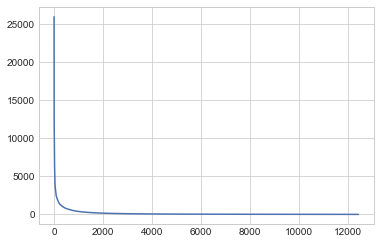

In [90]:
scounts = [y for x,y in wordtab]
plt.plot(scounts)
plt.show()

<b>Question 18)</b> What form does this curve have?. To make it clearer, lets do a log-log plot. <b>[2 Points]</b>

<b>Answer:</b> This looks like a "L" shaped curve. So initially there is an extremely large count of words in rank order, but drops drastically and stays low.   

In the log-log plot, the axes show the values of variables, not the actual value itself. So because both of these show the same correlation, at the start, there is a lot of complexity of values of the variable at the beginning and slowly declines before it does a sharp drop off, which is similar to how there was a sharp drop in words in rank order. The frequency of complex words drop 

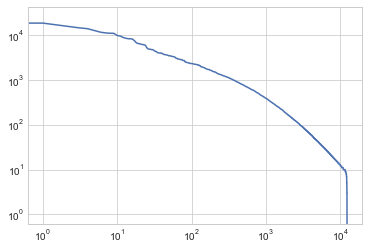

In [91]:
plt.loglog(scounts)
plt.show()